# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [ ]:
using DotEnv
using Pkg

DotEnv.load!()
path = ENV["ENV_PATH"]
Pkg.activate(path)

using DataFrames
using Statistics
using Downloads
using Plots
using Dates
using CSV

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [4]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
file = Downloads.download(url)
tips = CSV.read(file, DataFrame)
first(tips, 5)

5×8 DataFrame
 Row │ Column1  total_bill  tip      sex      smoker   day      time     size  ⋯
     │ Int64    Float64     Float64  String7  String3  String7  String7  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       0       16.99     1.01  Female   No       Sun      Dinner       2 ⋯
   2 │       1       10.34     1.66  Male     No       Sun      Dinner       3
   3 │       2       21.01     3.5   Male     No       Sun      Dinner       3
   4 │       3       23.68     3.31  Male     No       Sun      Dinner       2
   5 │       4       24.59     3.61  Female   No       Sun      Dinner       4 ⋯

### Step 4. Delete the Unnamed 0 column

In [5]:
tips = tips[!, Not(["Column1"])]
first(tips, 5)

5×7 DataFrame
 Row │ total_bill  tip      sex      smoker   day      time     size  
     │ Float64     Float64  String7  String3  String7  String7  Int64 
─────┼────────────────────────────────────────────────────────────────
   1 │      16.99     1.01  Female   No       Sun      Dinner       2
   2 │      10.34     1.66  Male     No       Sun      Dinner       3
   3 │      21.01     3.5   Male     No       Sun      Dinner       3
   4 │      23.68     3.31  Male     No       Sun      Dinner       2
   5 │      24.59     3.61  Female   No       Sun      Dinner       4

### Step 5. Plot the total_bill column histogram

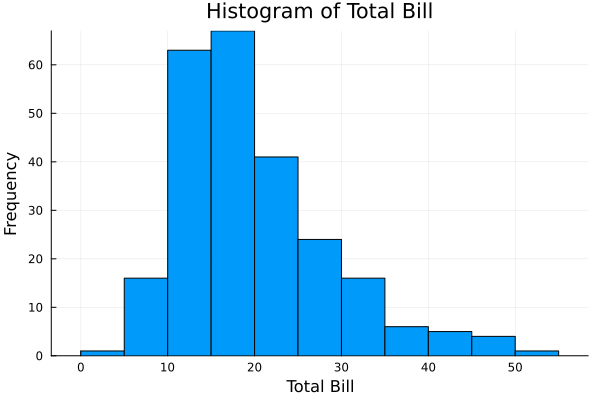

In [6]:
histogram(
    tips[!, "total_bill"], bins=10, 
    xlabel="Total Bill", ylabel="Frequency", title="Histogram of Total Bill",
    label=false
)

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

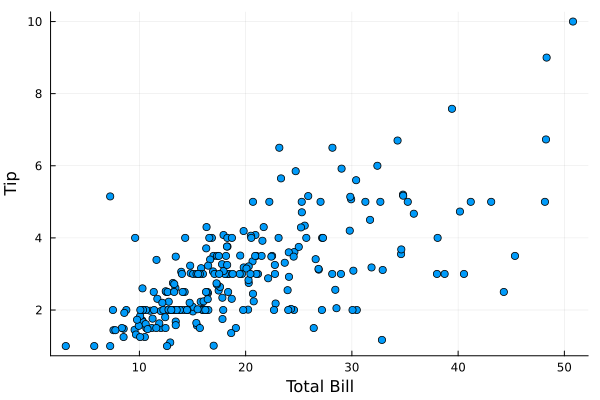

In [7]:
scatter(
    tips[!, "total_bill"], tips[!, "tip"],
    xlabel = "Total Bill",
    ylabel = "Tip",
    legend=false
)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

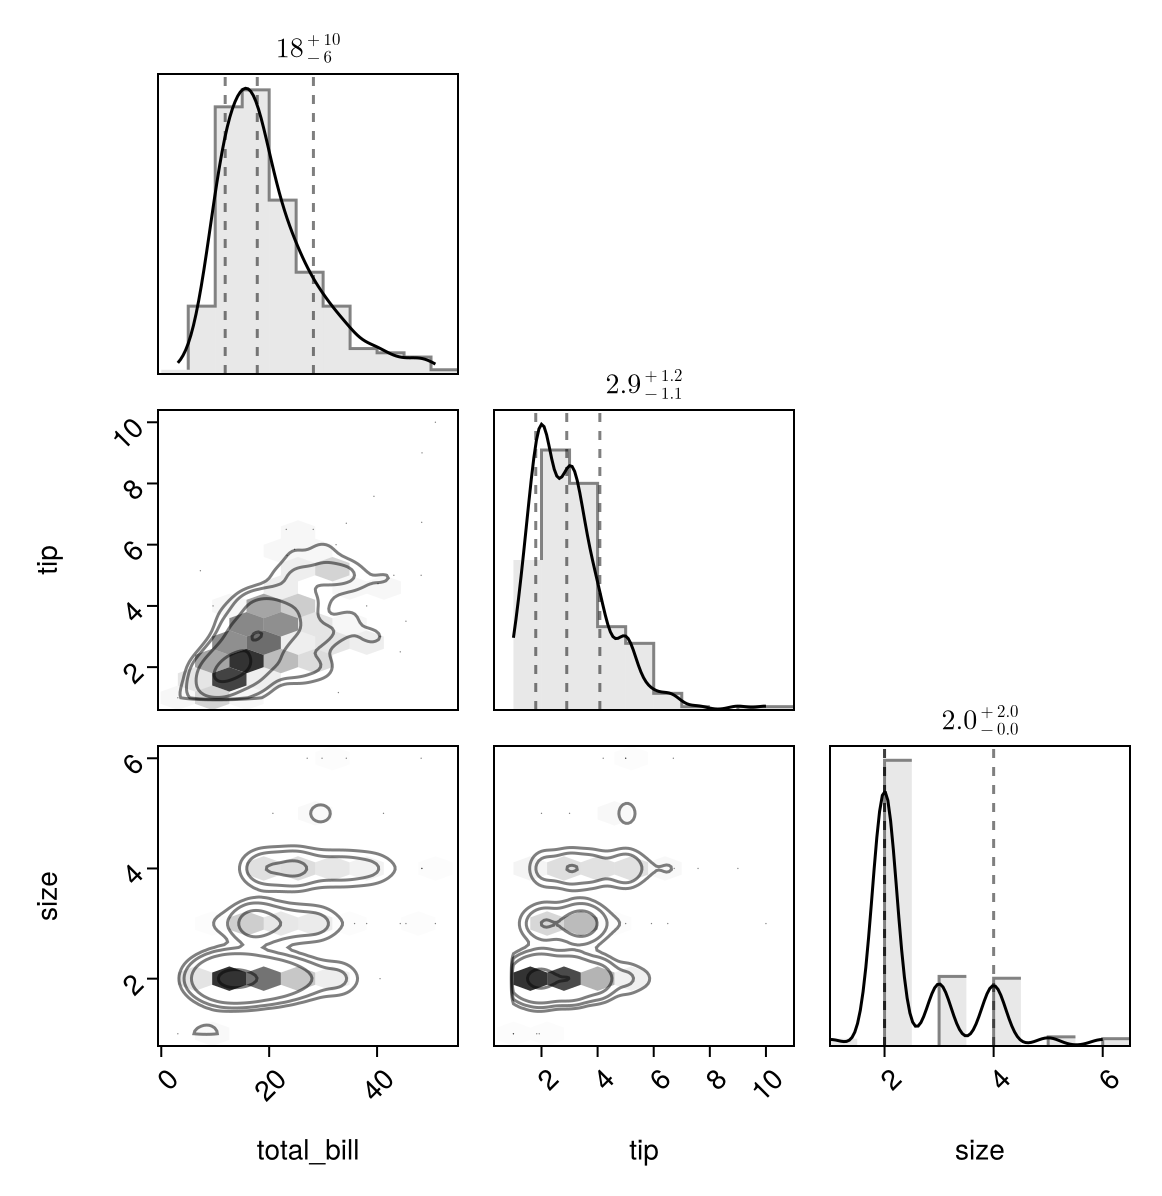

In [20]:
using CairoMakie
using PairPlots

pairplot(tips[!, ["total_bill", "tip", "size"]])

### Step 8. Present the relationship between days and total_bill value

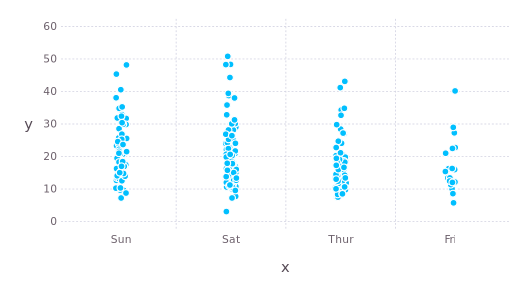

In [26]:
# rainclouds(tips[!, "day"], tips[!, "total_bill"])
using Gadfly
set_default_plot_size(14cm, 8cm)

Gadfly.plot(x=tips[!, "day"], y=tips[!, "total_bill"], Stat.x_jitter(range=0.1), Geom.point)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

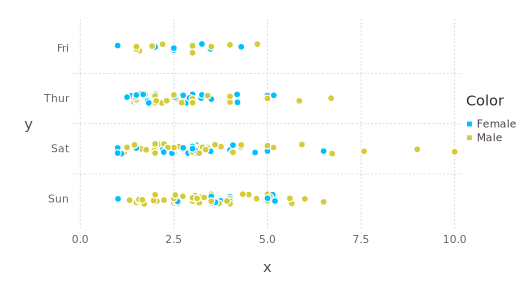

In [27]:
Gadfly.plot(
    x = tips[!, "tip"], 
    y = tips[!, "day"], 
    Stat.y_jitter(range=0.2), 
    color = tips[!, "sex"], 
    Geom.point
)

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

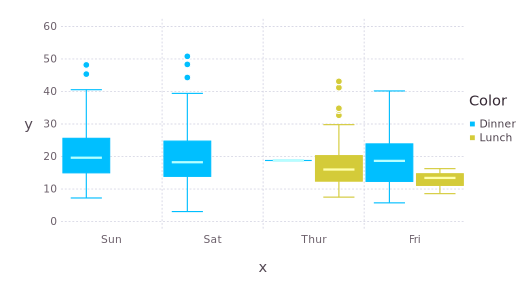

In [28]:
Gadfly.plot(
    x = tips[!, "day"], 
    y = tips[!, "total_bill"],
    color = tips[!, "time"], 
    Geom.boxplot
)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

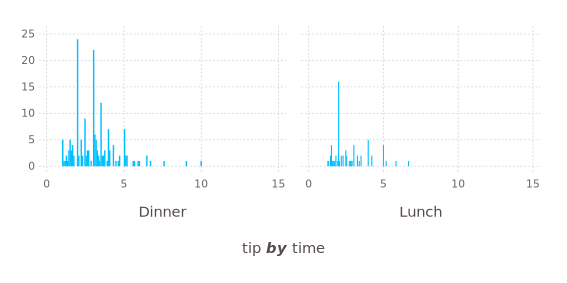

In [29]:
set_default_plot_size(15cm, 7.5cm)
Gadfly.plot(tips, xgroup="time", x="tip", Geom.subplot_grid(Geom.histogram))

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

In [30]:
Gadfly.plot(tips, xgroup="sex", x="total_bill", y="tip", color="smoker", Geom.subplot_grid(Geom.point))

### BONUS: Create your own question and answer it using a graph.